In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
dataset=pd.read_csv('29-bestsellers_with_categories.csv')

In [51]:
missing_data=dataset.isnull().sum()
print("missing data:\n",missing_data)

missing data:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [52]:
# Remove duplicate rows based on the 'Name' column, keeping the first occurrence
dataset = dataset.drop_duplicates(subset='Name', keep='first')

In [73]:
print("Shape of dataset:", dataset.shape)

Shape of dataset: (351, 7)


In [53]:
dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


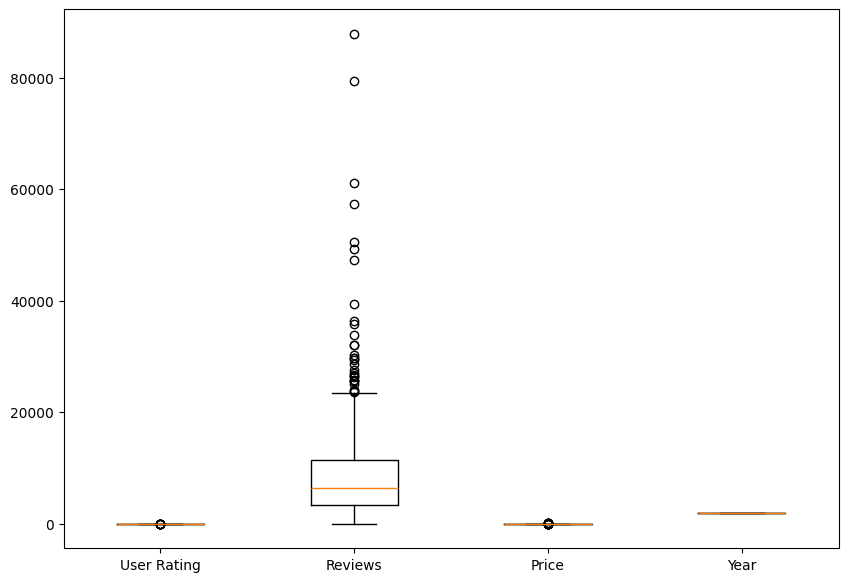

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

numeric_data = dataset.select_dtypes(include=np.number)
plt.figure(figsize=(10, 7))
plt.boxplot([numeric_data[col] for col in numeric_data.columns], tick_labels=numeric_data.columns)
plt.show()

In [55]:
Q1 = dataset['Reviews'].quantile(0.25)
Q3 = dataset['Reviews'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR) for Reviews:", IQR)

Interquartile Range (IQR) for Reviews: 8028.0


In [56]:
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset to remove outliers in 'Reviews'
filtered_dataset = dataset[(dataset['Reviews'] >= lower_bound) & (dataset['Reviews'] <= upper_bound)]
filtered_dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


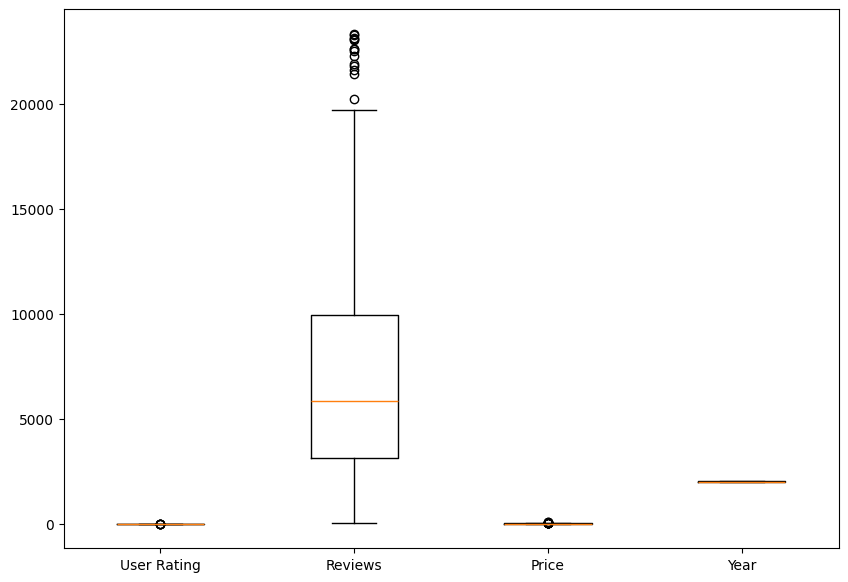

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

numeric_data = filtered_dataset.select_dtypes(include=np.number)
plt.figure(figsize=(10, 7))
plt.boxplot([numeric_data[col] for col in numeric_data.columns], tick_labels=numeric_data.columns)
plt.show()

In [58]:
filtered_dataset = filtered_dataset.drop(columns=['Name'])
print("Dropped 'Name' column from both dataset and filtered_dataset.")

Dropped 'Name' column from both dataset and filtered_dataset.


In [74]:
missing_data=filtered_dataset.isnull().sum()
print("missing data:\n",missing_data)
dataset.head()

missing data:
 Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [60]:
import category_encoders as ce

# Select columns to encode and the target
cols_to_encode = ['Author']
target = 'User Rating'

# Make sure we have a copy, not a view, of the dataset
filtered_dataset = filtered_dataset.copy()

# Initialize and fit the target encoder
encoder = ce.TargetEncoder(cols=cols_to_encode)

# Get encoded columns
encoded_cols = encoder.fit_transform(filtered_dataset[cols_to_encode], filtered_dataset[target])

# Replace the original columns with encoded values using .loc
for col in cols_to_encode:
    filtered_dataset.loc[:, col] = encoded_cols[col].values
    # Convert to float64
    filtered_dataset[col] = filtered_dataset[col].astype('float64')

print("Filtered dataset after encoding:")
print(filtered_dataset.head())

Filtered dataset after encoding:
     Author  User Rating  Reviews  Price  Year        Genre
0  4.628458          4.7    17350      8  2016  Non Fiction
1  4.602176          4.6     2052     22  2011      Fiction
2  4.628458          4.7    18979     15  2018  Non Fiction
3  4.628458          4.7    21424      6  2017      Fiction
4  4.641468          4.8     7665     12  2019  Non Fiction


In [61]:
x=filtered_dataset.iloc[:,:-1].values
print(x)

[[4.62845752e+00 4.70000000e+00 1.73500000e+04 8.00000000e+00
  2.01600000e+03]
 [4.60217554e+00 4.60000000e+00 2.05200000e+03 2.20000000e+01
  2.01100000e+03]
 [4.62845752e+00 4.70000000e+00 1.89790000e+04 1.50000000e+01
  2.01800000e+03]
 ...
 [4.64146837e+00 4.80000000e+00 2.16250000e+04 9.00000000e+00
  2.01300000e+03]
 [4.67425699e+00 4.90000000e+00 9.41300000e+03 8.00000000e+00
  2.01900000e+03]
 [4.62845752e+00 4.70000000e+00 1.43310000e+04 8.00000000e+00
  2.01600000e+03]]


In [62]:
y=filtered_dataset.iloc[:,[-1]].values
print(y)

[['Non Fiction']
 ['Fiction']
 ['Non Fiction']
 ['Fiction']
 ['Non Fiction']
 ['Fiction']
 ['Fiction']
 ['Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Fiction']
 ['Non Fiction']
 ['Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Fiction']
 ['Non Fiction']
 ['Fiction']
 ['Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Fiction']
 ['Fiction']
 ['Fiction']
 ['Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Non Fiction']
 ['Fiction']
 ['Fiction']
 ['Fiction']
 ['Non Fiction']
 ['Fiction']
 ['Non Fiction']
 ['Fiction']
 ['Fiction']
 ['Fiction']
 ['Fiction']
 ['Fiction']
 ['

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)

[1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0
 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1
 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0
 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1
 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1]


d:\ML_Projects\env\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [65]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=1)
log_reg.fit(x_train, y_train.ravel())

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [66]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = log_reg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.676923076923077


In [67]:
print("Shape of x:", x.shape)

Shape of x: (321, 5)


In [68]:
ones=np.ones((321,1)).astype(int)
x=np.append(ones,x,axis=1)

In [69]:
print(x)

[[1.00000000e+00 4.62845752e+00 4.70000000e+00 1.73500000e+04
  8.00000000e+00 2.01600000e+03]
 [1.00000000e+00 4.60217554e+00 4.60000000e+00 2.05200000e+03
  2.20000000e+01 2.01100000e+03]
 [1.00000000e+00 4.62845752e+00 4.70000000e+00 1.89790000e+04
  1.50000000e+01 2.01800000e+03]
 ...
 [1.00000000e+00 4.64146837e+00 4.80000000e+00 2.16250000e+04
  9.00000000e+00 2.01300000e+03]
 [1.00000000e+00 4.67425699e+00 4.90000000e+00 9.41300000e+03
  8.00000000e+00 2.01900000e+03]
 [1.00000000e+00 4.62845752e+00 4.70000000e+00 1.43310000e+04
  8.00000000e+00 2.01600000e+03]]


In [70]:
x_opt=x[:,:]
x_opt=x_opt.astype(np.float64)
print(x_opt)

[[1.00000000e+00 4.62845752e+00 4.70000000e+00 1.73500000e+04
  8.00000000e+00 2.01600000e+03]
 [1.00000000e+00 4.60217554e+00 4.60000000e+00 2.05200000e+03
  2.20000000e+01 2.01100000e+03]
 [1.00000000e+00 4.62845752e+00 4.70000000e+00 1.89790000e+04
  1.50000000e+01 2.01800000e+03]
 ...
 [1.00000000e+00 4.64146837e+00 4.80000000e+00 2.16250000e+04
  9.00000000e+00 2.01300000e+03]
 [1.00000000e+00 4.67425699e+00 4.90000000e+00 9.41300000e+03
  8.00000000e+00 2.01900000e+03]
 [1.00000000e+00 4.62845752e+00 4.70000000e+00 1.43310000e+04
  8.00000000e+00 2.01600000e+03]]


In [71]:
import statsmodels.api as sm

# Use x directly since it already contains a column of ones (intercept)
logit_model = sm.Logit(y, x)
result = logit_model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.609336
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  321
Model:                          Logit   Df Residuals:                      315
Method:                           MLE   Df Model:                            5
Date:                Mon, 23 Jun 2025   Pseudo R-squ.:                  0.1058
Time:                        14:07:16   Log-Likelihood:                -195.60
converged:                       True   LL-Null:                       -218.75
Covariance Type:            nonrobust   LLR p-value:                 7.898e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -145.6614     91.318     -1.595      0.111    -324.642      33.319
x1           -33.1456     10.

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Convert y to 1D array and to integer labels for classification
y_class = y.ravel().astype(int)

log_reg = LogisticRegression(max_iter=1000)
scores = cross_val_score(log_reg, x, y_class, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", scores.mean())

Cross-validated Accuracy: 0.6199038461538462
